<a href="https://colab.research.google.com/github/beyzabaslik/gitwork/blob/main/credit_card_fraud_detection_som.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install minisom

  Preparing metadata (setup.py) ... done
  Created wheel for minisom: filename=MiniSom-2.3.5-py3-none-any.whl size=12031 sha256=37f242475a3b0277400e8fedd269e47af3442443471c6e7a714f41b0c836c196
  Stored in directory: /root/.cache/pip/wheels/19/db/95/5e53bc2b88a328217fdf9f2886cafbe86b0df274f4b601f572
Successfully built minisom


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [5]:

file_path = '/content/drive/MyDrive/Credit_Card_Applications.csv'
dataset = pd.read_csv(file_path)
x = dataset.iloc[:, :-1].values
y = dataset.iloc[:,:-1].values

In [6]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
x = sc.fit_transform(x)

In [7]:
from minisom import MiniSom
som = MiniSom(x=10,y=10,input_len =15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(x)
som.train_random(data = x, num_iteration = 100)

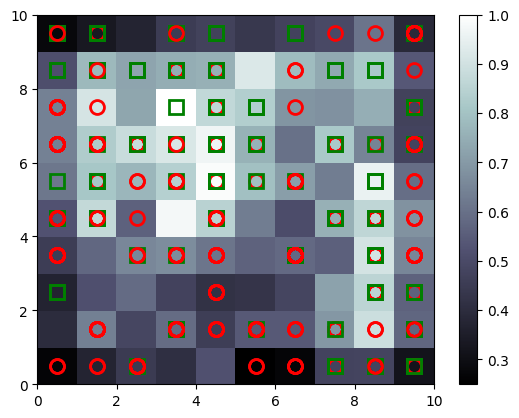

In [19]:

from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x_val in enumerate(dataset.iloc[:, :-1].values):
    x_scaled = sc.transform([x_val])
    w = som.winner(x_scaled[0])
    class_label = dataset.iloc[i, -1]
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[int(class_label)],
         markeredgecolor = colors[int(class_label)],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [28]:
mappings = som.win_map(dataset.iloc[:, :-1].values)
if (8, 1) in mappings and (6, 9) in mappings:
    frauds = np.concatenate((mappings[(8,1)], mappings[(6,9)]), axis = 0)
    frauds = frauds.reshape(-1, 15)
    frauds = sc.inverse_transform(frauds)
    print(frauds)
else:
    print("Warning: One or both of the specified neuron coordinates do not have any data points assigned.")